In [1]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/annotations.tar.gz
!tar -xf images.tar.gz
!tar -xf annotations.tar.gz

--2024-12-18 22:30:04--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2024-12-18 22:30:05--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/pets/images.tar.gz [following]
--2024-12-18 22:30:06--  https://thor.robots.ox.ac.uk/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791918971 (755M) [app

In [2]:
import os
image_path = "images/"
annotation_path = "annotations/trimaps/"

In [3]:
images_input_path = sorted(
    [os.path.join(image_path, fname) for fname in os.listdir(image_path) if fname.endswith(".jpg")]
)
annotations_input_path = sorted(
    [os.path.join(annotation_path, fname) for fname in os.listdir(annotation_path) if fname.endswith(".png") and not fname.startswith(".")])


In [4]:
import tensorflow
from tensorflow.keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt

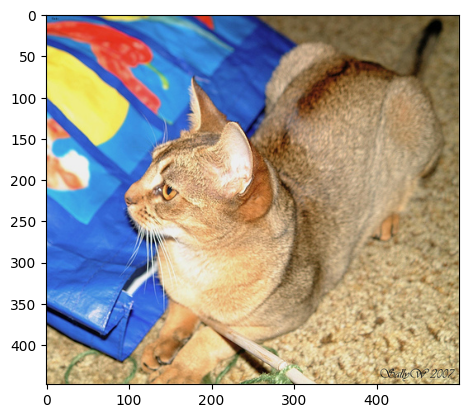

In [5]:
image = load_img(images_input_path[9])
plt.imshow(image)

In [6]:
#image_1 = load_image(img_to_array(annotations_input_path[9]))
#plt.imshow(image_1)
import numpy as np


def show_anotation(image):
    image = (image.astype(np.int8))
    plt.axis("off")
    plt.imshow(image[:, :, 0])


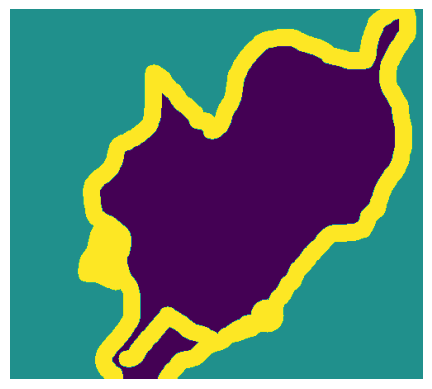

In [7]:
#image_1 = show_anotation(annotations_input_path[9])
image = img_to_array(load_img(annotations_input_path[9]))
image = show_anotation(image)

In [8]:
import random
target_size = (200, 200)
# Use the built-in len function instead of the variable 'len'
data_len = len(images_input_path)

random.Random(1337).shuffle(images_input_path)
random.Random(1337).shuffle(annotations_input_path)

def path_to_input(path):
    return img_to_array(load_img(path, target_size = target_size))

def path_to_output(path):
    image = img_to_array(
        load_img(path, target_size=target_size, color_mode="grayscale"))
    image = image.astype("uint8") -1
    return image

# Now data_len should have the correct value, and the rest of the code should work
data = np.zeros((data_len,) + target_size + (3,), dtype="float32")
labels = np.zeros((data_len,) + target_size + (1,), dtype="uint8")

for i in range(data_len):
    data[i] = path_to_input(images_input_path[i])
    labels[i] = path_to_output(annotations_input_path[i])

num_val_samples = 1000
train_data = data[:-num_val_samples]
train_labels = labels[:-num_val_samples]
val_data = data[-num_val_samples:]
val_labels = labels[-num_val_samples:]

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model(img_size, num_classes):
    inputs = keras.Input(shape = img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)

    x = layers.Conv2D(64, 3, strides = 2, activation="relu", padding="same")(x) #Typo here: Convo2D should be Conv2D
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)  #Typo here: Convo2D should be Conv2D
    x = layers.Conv2D(128, 3, strides = 2, activation="relu",padding="same")(x) #Typo here: Convo2D should be Conv2D

    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x) #Typo here: Convo2D should be Conv2D
    x = layers.Conv2D(256, 3,strides = 2, activation="relu", padding="same")(x) #Typo here: Convo2D should be Conv2D
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x) #Typo here: Convo2D should be Conv2D

    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same", strides= 2)(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu",padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same",strides=2)(x)

    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size=target_size, num_classes=3)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 100, 100, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 50, 50, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 25, 25, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 25, 25, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 50, 50, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 50, 50, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 100, 100, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_4 (Conv2DTranspose) │ (None, 100, 100, 64)        │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_5 (Conv2DTranspose) │ (None, 200, 200, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 200, 200, 3)         │           1,731 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,880,643 (10.99 MB)

 Trainable params: 2,880,643 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "rmsprop", metrics = ["accuracy"])

In [11]:
callbacks = [
    keras.callbacks.ModelCheckpoint("oxford_segmentation.keras", save_best_only=True)]

history = model.fit(train_data, train_labels, epochs=50, validation_data=(val_data, val_labels), callbacks=callbacks)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 110s 414ms/step - accuracy: 0.5754 - loss: 0.9531 - val_accuracy: 0.5839 - val_loss: 0.8205
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 90s 280ms/step - accuracy: 0.6113 - loss: 0.8337 - val_accuracy: 0.5933 - val_loss: 0.8954
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 280ms/step - accuracy: 0.6712 - loss: 0.7884 - val_accuracy: 0.7053 - val_loss: 0.7373
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 275ms/step - accuracy: 0.6945 - loss: 0.7567 - val_accuracy: 0.6954 - val_loss: 0.7383
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 83s 281ms/step - accuracy: 0.7028 - loss: 0.7422 - val_accuracy: 0.7003 - val_loss: 0.7305
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 82s 280ms/step - accuracy: 0.7167 - loss: 0.6966 - val_accuracy: 0.7344 - val_loss: 0.6532
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 55s 277ms/step - accuracy: 0.7467 - loss: 0.6334 - val_accuracy: 0.7491 - val_loss: 0.6157
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 81s 270ms/step - accuracy: 0.7578 - loss: 